<a href="https://colab.research.google.com/github/Icon82/Tesi01/blob/main/Data_Source/EstrCo2_90_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

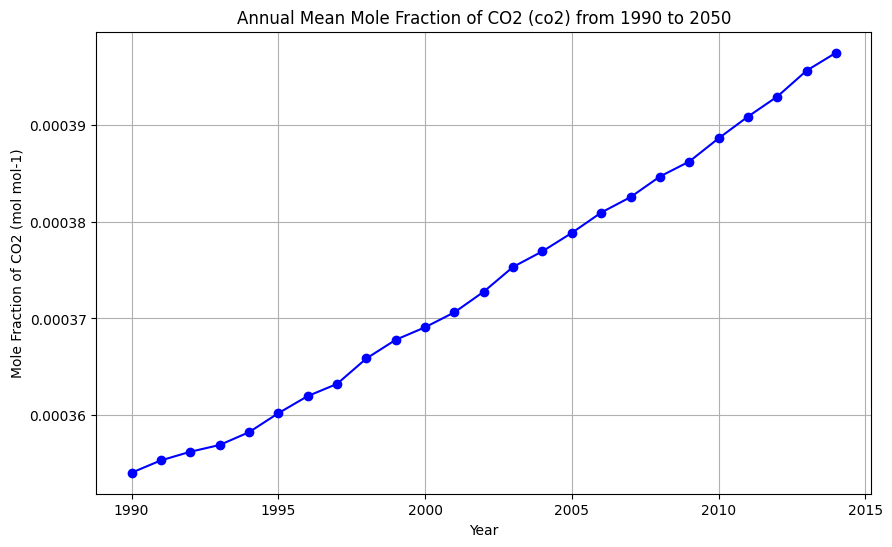

In [ ]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

# Carica il dataset NetCDF
file_path = '/content/drive/My Drive/Colab Notebooks/co2_Amon_CNRM-ESM2-1_historical_r1i1p1f2_gr_185001-201412.nc'
ds = xr.open_dataset(file_path)

# Seleziona il periodo dal 1990 al 2050
start_year = 1990
end_year = 2014
time_range = slice(f'{start_year}-01-01', f'{end_year}-12-31')

# Seleziona il livello di pressione di 100 Pa
plev_value = 1000000

# Seleziona il range di latitudini e longitudini
lat_range = slice(36.1286, 52.3731)

lon_range_1 = slice(350.8630, 360)
lon_range_2 = slice(0, 28.9759)

# Filtra il dataset per il periodo, il livello di pressione e le coordinate specificate
tas_filtered_time = ds.co2.sel(time=time_range)
tas_filtered_plev = tas_filtered_time.sel(plev=plev_value, method='nearest')
tas_filtered_lat_lon_1 = tas_filtered_plev.sel(lat=lat_range, lon=lon_range_1)
tas_filtered_lat_lon_2 = tas_filtered_plev.sel(lat=lat_range, lon=lon_range_2)

# Unisce i due filtri di longitudine
tas_filtered = xr.concat([tas_filtered_lat_lon_1, tas_filtered_lat_lon_2], dim='lon')

# Calcola la media annua per ogni anno
tas_annual_mean = tas_filtered.groupby('time.year').mean(dim=['time', 'lat', 'lon'])

# Converti i risultati in un DataFrame Pandas per una visualizzazione più semplice
tas_annual_mean_df = tas_annual_mean.to_dataframe().reset_index()

# Salva il DataFrame in un file CSV
csv_file_path = 'co2_annual_mean_1990_2014.csv'
tas_annual_mean_df.to_csv(csv_file_path, index=False)

# Plotta le medie annue
plt.figure(figsize=(10, 6))
plt.plot(tas_annual_mean_df['year'], tas_annual_mean_df['co2'], marker='o', linestyle='-', color='b')
plt.title('Annual Mean Mole Fraction of CO2 (co2) from 1990 to 2050')
plt.xlabel('Year')
plt.ylabel('Mole Fraction of CO2 (mol mol-1)')
plt.grid(True)
plt.show()
